<a href="https://colab.research.google.com/github/ShadiM0hamed/Smart-Board/blob/main/Gait_locomotion_disorder_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this line is used to connext the code to the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 77 kB 3.4 MB/s 


In [ ]:

#the data in the cloud was compressed, so we used this line of code to ex5ract the data to desired folder
from pyunpack import Archive
Archive('/content/drive/MyDrive/GaitLocomotionDisorder/Dataset-Copy.rar').extractall('/content/drive/MyDrive/GaitLocomotionDisorder/NormalDataset')

# 1- Importing Libraries

In [ ]:

#importing the libraries used in the code
import glob
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.mixture import GaussianMixture as GMM
 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2- Setting Variables

In [ ]:

#assigning the width and the height of the image, also the number of epochs and batch size in the learning model
image_w = 220
image_h = 140
batch_size = 32
epochs = 20

#Defining the Video Dataset Directory

In [ ]:

#Defining the folder containing the dataset of one of the classes
Abnormalbefore = glob.glob("/content/drive/MyDrive/GaitLocomotionDisorder/Abnormal Dataset Before Conversion to image files/*")
print("Abnormal before Conversion lens is {}".format(len(Abnormalbefore)))
print(Abnormalbefore[0])

Abnormal before Conversion lens is 4
/content/drive/MyDrive/GaitLocomotionDisorder/Abnormal Dataset Before Conversion to image files/y2mate.com - AboveKnee Amputee Gait Case Study 22_1080pFHR (online-video-cutter.com).mp4


Converting the Dataset from Videos to images

In [ ]:

#this part is used to get each image from the video and adding this image to the gmm model to remove the background from it
import cv2 
import os
!CV_Assert( ssize.area() > 0 );
#fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold = 100)
z = 0
for i in range(1, len(Abnormalbefore)):
  
 
  # Read the video from specified path 
  cam = cv2.VideoCapture(Abnormalbefore[i]) 
 
 
 
  print("Finished With a Video")
 
 
 
  try: 
    
    # creating a folder named data 
      if not os.path.exists('data'): 
          os.makedirs('data') 
 
  # if not created then raise error 
  except OSError: 
      print ('Error: Creating directory of data') 
 
  # frame 
  currentframe = 0
 
  while(True): 
    
    # reading from frame 
      ret,frame = cam.read()  
 
      
 
      if ret: 
        # if video is still left continue creating images 
          name = '/content/drive/MyDrive/GaitLocomotionDisorder/Abnormal Converted Dataset/Segmented with 2 GMMs comp3 of Vid2 image N.' + str(z +1)+ ' of video' +'.jpg'
          print ('Creating...' + name)
          frame = cv2.resize(frame, (220, 140))
          img2 = frame.reshape((-1,3))
          #print(img2.shape[0],img2.shape[1])
          #print(frame.shape[0],frame.shape[1])
          z=z+1
          #sending the images to the gmm model to remove the unwanted data and saving the images to the drive
 
          gmm_model = GMM(n_components=2, covariance_type='tied').fit(img2)
 
          gmm_labels = gmm_model.predict(img2)
 
        # This changes the output values of the vector from (0 or 1) to (0 or 255). 0 is black and 255 is white, so image can be distinguished 
          for i in range(gmm_labels.shape[0]):
                  if gmm_labels[i] == 0:
                          gmm_labels[i] = 255
                          
                  elif gmm_labels[i] == 255:
                          gmm_labels[i] = 0
          #print(frame.shape[0], frame.shape[1])
          segmented = gmm_labels.reshape(frame.shape[0], frame.shape[1])
          #print(segmented.shape[0],segmented.shape[1])

 
        # writing the extracted images 
          cv2.imwrite(name, segmented) 
        # increasing counter so that it will 
        # show how many frames are created 
          currentframe += 1
      else: 
          break
 
# Release all space and windows once done 
  cam.release() 
  cv2.destroyAllWindows()

# 3- Input the dataset

In [ ]:

#defining the folders containing the dataset and the images.
data_dir = '/content/drive/MyDrive/GaitLocomotionDisorder'
base_dir="/content/drive/MyDrive/GaitLocomotionDisorder"
 
import pathlib
data_dir = pathlib.Path(data_dir)
list(data_dir.glob('*/*.png'))
 
N1 = glob.glob(base_dir + '/NormalDataset/Dataset - Copy/Normal Gait/*')
N2 = glob.glob(base_dir + '/NormalDataset/Dataset - Copy/Normal Gait 2/fq00/*')
N3 = glob.glob(base_dir + '/NormalDataset/Dataset - Copy/Normal Gait 2/fq01/*')
N4 = glob.glob(base_dir + '/NormalDataset/Dataset - Copy/Normal Gait 2/fs00/*')
N5 = glob.glob(base_dir + '/NormalDataset/Dataset - Copy/Normal Gait 2/fs01/*')
Normal = N1+N2+N3+N4+N5
 
Abnormal  = glob.glob(base_dir + '/Abnormal Converted Dataset/*')
 
image_count = len(list(data_dir.glob('*/*.jpg')))
objects = {
'Normal Gait' : list(Normal),
'Abnormal Gait' : list(Abnormal)
}
 
objects_labels = {
    'Normal Gait' : 0,
   'Abnormal Gait' : 1,
    }
#printing the number of each class's images
print("Number of Normal Images : " + str(len(objects['Normal Gait'])))
print("Number of Abnormal Images : " + str(len(objects['Abnormal Gait'])))

Number of Normal Images : 15689
Number of Abnormal Images : 31315


# 4- Adding Labels to the Dataset

In [ ]:

#transforming the images into number and assigning a label to each image
X, y = [], []
w = 1
for name, images in objects.items():
    print("Printing...")
    for image in images:
          
        img = cv2.imread(str(image))
        
      
        try:
            resized = cv2.resize(img, (220,140))
            print(w)
            w = w + 1 
            X.append(resized)
            y.append(objects_labels[name])
        except:
            print('skipped')
            break
        
X = np.array(X)
y = np.array(y)
print("Finished")
print(Normal[0])
print(Abnormal[0])

Printing...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


KeyboardInterrupt: ignored

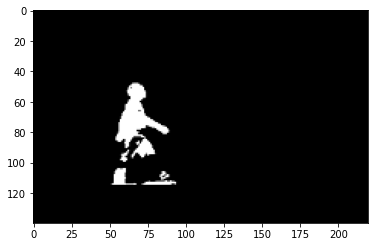

In [ ]:
plt.figure()
plt.imshow(X[0])

# 5- Splitting the Data

In [ ]:

#splitting the data to define the testing sample and the training one
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 
print(len(X_train), len(X_test),len(y_train), len(y_test))

# 9- Building The Model

In [ ]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', 
           activation ='relu', input_shape = (image_w, image_h, 3)),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation ='relu'),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation ='relu'),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation ='relu'),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', 
                   patience=8, 
                   restore_best_weights=True)

# lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
#                                  patience = 4, 
#                                  verbose=1,
#                                  factor=0.5, 
#                                  min_lr=0.00005)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 140, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 70, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 70, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 55, 35, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 35, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 17, 128)       0

#10- Training the Model

In [ ]:
history = model.fit(X_train, y_train, epochs = 30)

Epoch 1/10
1176/1176 [==============================] - 48s 41ms/step - loss: 0.0092 - accuracy: 0.9996
Epoch 2/10
1176/1176 [==============================] - 48s 41ms/step - loss: 3.3520e-04 - accuracy: 0.9999
Epoch 3/10
1176/1176 [==============================] - 48s 41ms/step - loss: 0.0029 - accuracy: 0.9999
Epoch 4/10
1176/1176 [==============================] - 48s 41ms/step - loss: 4.3753e-04 - accuracy: 0.9999
Epoch 5/10
1176/1176 [==============================] - 48s 41ms/step - loss: 2.5564e-05 - accuracy: 1.0000
Epoch 6/10
1176/1176 [==============================] - 48s 41ms/step - loss: 1.6698e-04 - accuracy: 0.9999
Epoch 7/10
1176/1176 [==============================] - 48s 41ms/step - loss: 2.1123e-07 - accuracy: 1.0000
Epoch 8/10
1176/1176 [==============================] - 48s 41ms/step - loss: 0.0047 - accuracy: 0.9997
Epoch 9/10
1176/1176 [==============================] - 48s 40ms/step - loss: 0.0028 - accuracy: 0.9999
Epoch 10/10
1176/1176 [=====================

In [ ]:
model.evaluate(X_test, y_test)

#11- Plotting the accuracy and the Lost Function

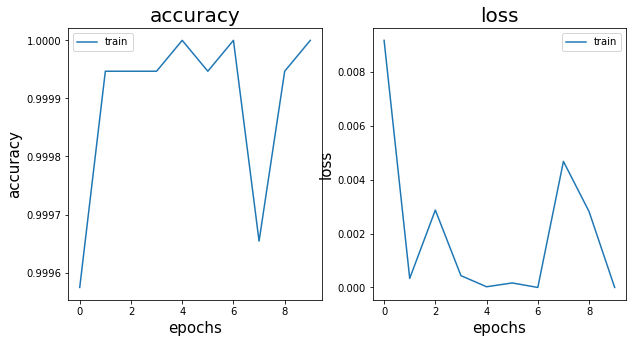

In [ ]:
# plot the accuracy and loss of the model
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, e in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[e])
    ax[i].set_title(e, fontsize=20)
    ax[i].set_xlabel('epochs', fontsize=15)
    ax[i].set_ylabel(e, fontsize=15)
    ax[i].legend(['train', 'val'])

#12- Plotting the Confusion Matrix of the Model

(<Figure size 576x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f06ec368e80>)

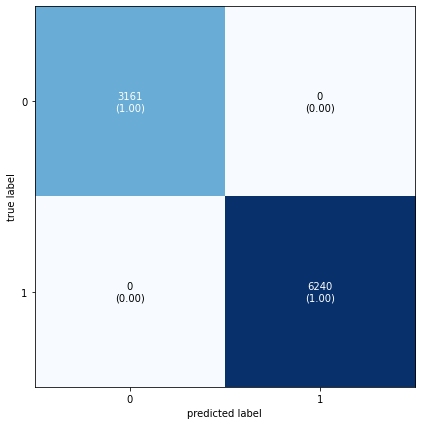

In [ ]:
predictions = model.predict_classes(X_test)

cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(conf_mat = cm, 
                      figsize=(8,7),
                      show_normed=True)

#13- Calculating the Accuracy of the model


In [ ]:
test_accuracy = (cm[0, 0] + cm[1, 1])/ len(X_test)
print("Test Accuracy: {}%".format(test_accuracy * 100, 3))

Test Accuracy: 100.0%


#14- Saving the model


In [ ]:
model.save('/content/drive/MyDrive/GaitLocomotionDisorder/Saved Model/model.h5')